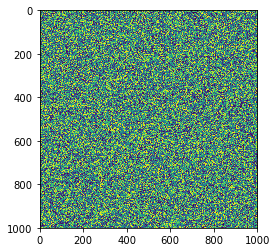

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy peak array
spec = np.random.random((1000, 1000))

fig, ax = plt.subplots()
ax.imshow(spec)

In [31]:
import time
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure
from scipy.ndimage.morphology import iterate_structure

fp = generate_binary_structure(rank = 2, connectivity = 1)
foot = iterate_structure(fp, 20)
spec_max = maximum_filter(spec, footprint=foot)
out = np.logical_and(spec == spec_max, spec > 0.9)

In [30]:
from scipy.ndimage._nd_image import min_or_max_filter
from scipy.ndimage.filters import maximum_filter
import cProfile
import pstats

cProfile.run('maximum_filter(spec, footprint=foot)', 'restats')
#cProfile.run('min_or_max_filter(spec, footprint=foot)', 'restats')
p = pstats.Stats('restats')
p.sort_stats('time').print_stats(25);

Fri Jul 13 14:07:20 2018    restats

         35 function calls in 1.450 seconds

   Ordered by: internal time
   List reduced from 28 to 25 due to restriction <25>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.448    1.448    1.448    1.448 {built-in method scipy.ndimage._nd_image.min_or_max_filter}
        1    0.001    0.001    1.449    1.449 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.zeros}
        1    0.000    0.000    1.450    1.450 {built-in method builtins.exec}
        2    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    1.449    1.449 c:\program files\anaconda3\lib\site-packages\scipy\ndimage\filters.py:1013(_min_or_max_filter)
        1    0.000    0.000    0.000    0.000 {method 'astype' of 'numpy.ndarray' objects}
        1    0.000    0.000    1.449    1.449 c:\program files\anaconda3\lib\site-packages\scipy\n